In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
def original_func(x):
    """
    Original function for Entanglement Entropy: 
    log(1+x^2) - (2x^2)/(1+x^2) log(x).
    Input: float
    Output: float
    """
    x_sq = x**2
    ret_val = np.log(1+x_sq) - (((2*x_sq)/(1+x_sq))*np.log(x))
    return ret_val

Entanglement Entropy is $$\mathcal{S}_A(x) = \log(1+x^2) - \frac{2x^2}{(1+x^2)}\log(x),$$
where $$x = \frac{\mathfrak{g}}{2\omega_m}$$

In [4]:
def approx_func(x):
    """
    Approximation function for Entanglement Entropy: 
    x^2(1-2log(x)) + x^4(2log(x) - 1/2) + O(x^6)
    Input: float
    Output: float
    """
    x_sq = x**2
    ret_val = x_sq*(1-(2*np.log(x))) + (x**4)*((2*np.log(x)) - 0.5)
    return ret_val

The Approximation is $$\mathcal{S}_A(x) \approx x^2(1-2\log(x)) + x^4(2\log(x) - \frac{1}{2}) + \mathcal{O}(x^6)$$

In [5]:
%matplotlib inline

In [6]:
X = np.linspace(1e-30, 0.5, 100000) #This is the likely region where coupling/2w_m would fall, I think.

In [7]:
Y_org = original_func(X)
Y_approx = approx_func(X)

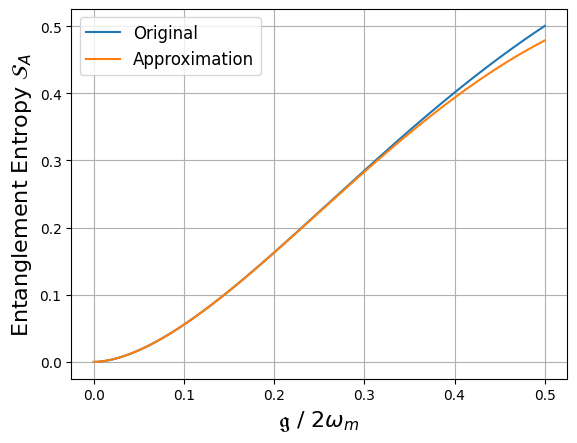

In [8]:
plt.plot(X, Y_org, label="Original")
plt.plot(X, Y_approx, label="Approximation")
plt.xlabel('$\mathfrak{g}$ / $2\omega_m$', fontsize=16)
plt.ylabel('Entanglement Entropy $\mathcal{S}_A$', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=20)
plt.grid()
plt.legend(fontsize=12)
fig = plt.gcf()
#fig.set_size_inches(6.5, 5.5)
fig.savefig('EEApprox.pdf', dpi=600, bbox_inches = 'tight')

In [9]:
import scipy.constants as const

In [10]:
G = const.G

In [11]:
hbar = const.hbar

In [12]:
c = const.c

In [13]:
w_m = 1e8

In [14]:
m = 1e-14

In [15]:
d = np.linspace(5e-5, 2e-4, 100000)

In [16]:
g1 = (G*m)/((d**3)*w_m)

In [17]:
g2 = (2*G*m*w_m)/((c**2)*d)

In [18]:
g3 = (9*G*hbar*(w_m**2))/(16*(c**4)*d)

In [19]:
def original_func_coup(g):
    """
    Original function for Entanglement Entropy: 
    log(1+(g/2w_m)^2) - (2(g/2w_m)^2)/(1+(g/2w_m)^2) log((g/2w_m)).
    Input: float
    Output: float
    """
    x = g/(2*w_m)
    ret_val = np.log(1+(x**2)) - (((2*(x**2))/(1+(x**2)))*np.log(x))
    return ret_val

In [20]:
ee1 = original_func_coup(g1)
ee2 = original_func_coup(g2)
ee3 = original_func_coup(g3)

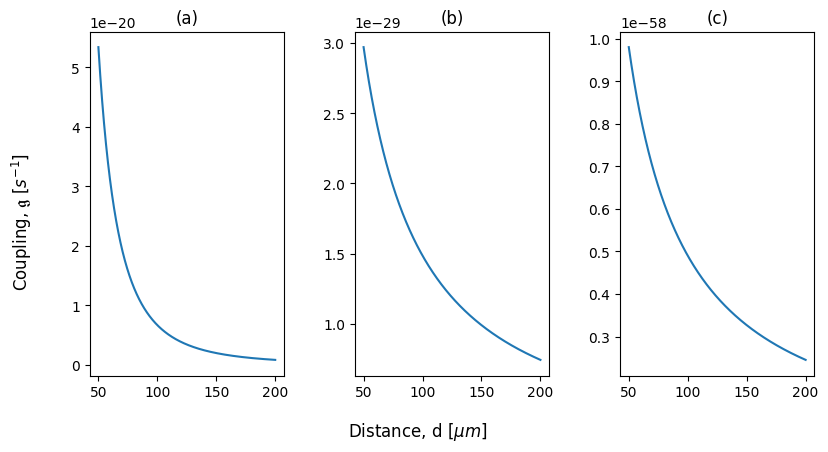

In [21]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(d*1e6, g1)
ax[1].plot(d*1e6, g2)
ax[2].plot(d*1e6, g3)
for i in range(3):
    ax[i].tick_params(axis='both', which='major', labelsize=10)
ax[0].set_title("(a)")
ax[1].set_title("(b)")
ax[2].set_title("(c)")
fig.supxlabel("Distance, d [$\mu m$]", fontsize=12)
fig.supylabel("Coupling, $\mathfrak{g}$ [$s^{-1}$]", fontsize=12)
fig.tight_layout()
fig.set_size_inches(8.5, 4.5)
fig.savefig('Coupling.pdf', dpi=600, bbox_inches = 'tight')

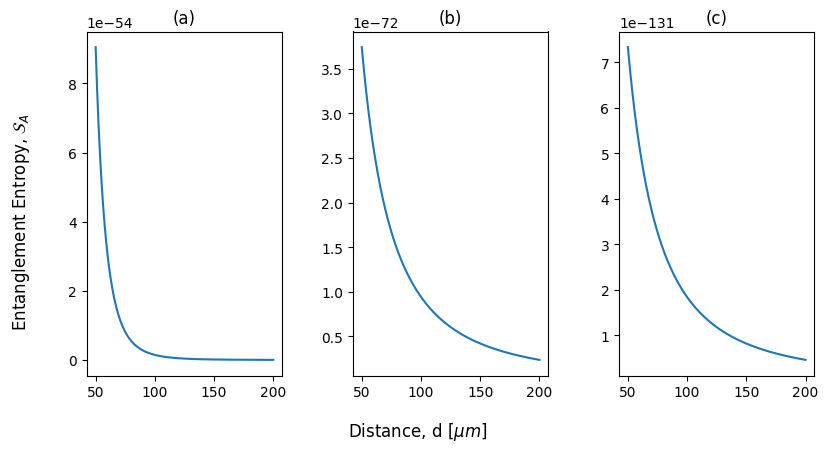

In [22]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(d*1e6, ee1)
ax[1].plot(d*1e6, ee2)
ax[2].plot(d*1e6, ee3)
for i in range(3):
    ax[i].tick_params(axis='both', which='major', labelsize=10)
ax[0].set_title("(a)")
ax[1].set_title("(b)")
ax[2].set_title("(c)")
fig.supxlabel("Distance, d [$\mu m$]", fontsize=12)
fig.supylabel("Entanglement Entropy, $\mathcal{S}_A$", fontsize=12)
fig.tight_layout()
fig.set_size_inches(8.5, 4.5)
fig.savefig('EECases.pdf', dpi=600, bbox_inches = 'tight')

In [23]:
def concurrence_approx(g):
    """
    Approx function for Concurrence
    Input: float
    Output: float
    """
    x = g/(2*w_m)
    return 2*x

In [24]:
con1 = concurrence_approx(g1)
con2 = concurrence_approx(g2)
con3 = concurrence_approx(g3)

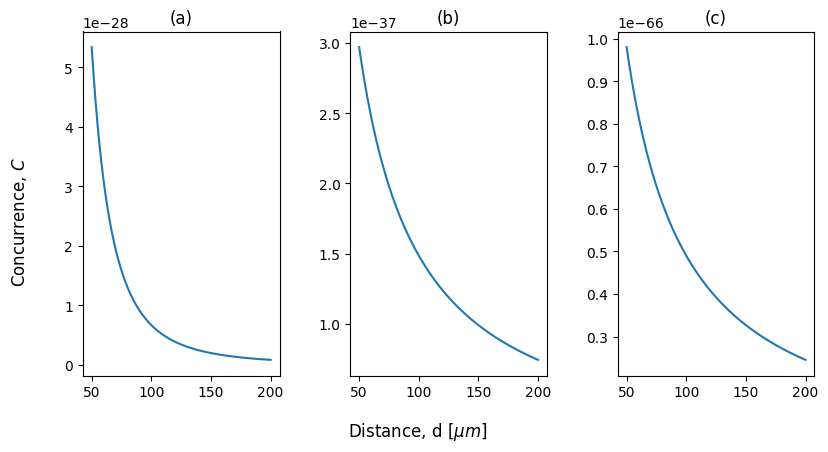

In [25]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(d*1e6, con1)
ax[1].plot(d*1e6, con2)
ax[2].plot(d*1e6, con3)
for i in range(3):
    ax[i].tick_params(axis='both', which='major', labelsize=10)
ax[0].set_title("(a)")
ax[1].set_title("(b)")
ax[2].set_title("(c)")
fig.supxlabel("Distance, d [$\mu m$]", fontsize=12)
fig.supylabel("Concurrence, $C$", fontsize=12)
fig.tight_layout()
fig.set_size_inches(8.5, 4.5)
fig.savefig('ConcCases.pdf', dpi=600, bbox_inches = 'tight')